# Gradient Descent

In [2]:
from typing import List

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

In [48]:
def sum_of_squares(v: Vector) -> float:
    '''Computes the sum of squared elements of v'''
    return dot(v, v)

In [3]:
# Frameworks expecting callback functions of specific signatures 
# might be type hinted using Callable[[Arg1Type, Arg2Type], ReturnType].
# https://docs.python.org/3/library/typing.html#callable

from typing import Callable

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

In [8]:
def square(x: float) -> float:
    return x * x

def deriverative(x: float) -> float:
    return 2 * x

In [6]:
xs = range(-10, 11)
list(xs)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
actuals = [deriverative(x) for x in xs]
actuals

[-20,
 -18,
 -16,
 -14,
 -12,
 -10,
 -8,
 -6,
 -4,
 -2,
 0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20]

In [17]:
estimates = [difference_quotient(square, x, h=0.001) for x in xs]
estimates

[-19.998999999984335,
 -17.998999999988996,
 -15.999000000007868,
 -13.999000000005424,
 -11.99900000000298,
 -9.999000000004088,
 -7.998999999999867,
 -5.998999999999199,
 -3.9989999999994197,
 -1.998999999999973,
 0.001,
 2.0009999999996975,
 4.000999999999699,
 6.000999999999479,
 8.0010000000037,
 10.001000000002591,
 12.001000000005035,
 14.00100000000748,
 16.000999999988608,
 18.000999999983947,
 20.000999999993496]

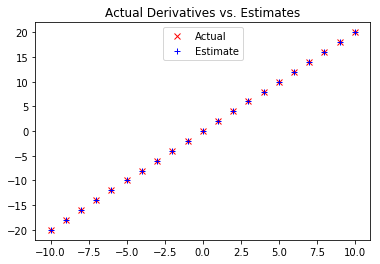

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.savefig('images/deriveratives.png')
plt.show();

In [27]:
# The enumerate object yields pairs containing a count (from start, which
# defaults to zero) and a value yielded by the iterable argument.

def partial_difference_quotient(f: Callable[[Vector], float],
                               v: Vector,
                               i: int,
                               h: float) -> float:
    '''Returns the i=th partial difference quotient of f at v'''
    for j, v_j in enumerate(v):
        print(j, v_j)

In [26]:
partial_difference_quotient(square, [1, 2, 3], 1, 0.001)

0 1
1 4
2 3


In [28]:
def partial_difference_quotient(f: Callable[[Vector], float],
                               v: Vector,
                               i: int,
                               h: float) -> float:
    '''Returns the i=th partial difference quotient of f at v'''
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [29]:
def estimate_gradient(f: Callable[[Vector], float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f, v, i , h)
           for i in range(len(v))]

In [46]:
import random
import math

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

def distance(v: Vector, w: Vector) -> float:  # type: ignore
    return magnitude(subtract(v, w))

In [31]:
# Get a random number in the range [a, b) or [a, b] depending on rounding.
v = [random.uniform(-10, 10) for i in range(3)]
v

[8.680660540649157, 1.5398814618718664, 2.9903369412349967]

In [85]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    '''Moves "step_size" in the "gradient" direction from "v"'''
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]
v

[-1.4137844224210756, 7.7417647419816475, 4.368044840186407]

In [86]:
for epoch in range(10000):
    # computer the gradient at v
    grad = sum_of_squares_gradient(v)
    #print(grad)
    # take a negative gradient step (minimalization)
    v = gradient_step(v, grad, -0.01)
    #print(v)

print(epoch, v)

assert distance(v, [0,0,0]) < 0.001

9999 [-2.577152493517081e-88, 1.4112270578603204e-87, 7.962400400764906e-88]


In [113]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20*x+5) for x in range(-50, 50)]
inputs[:5]

[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915)]

In [114]:
inputs[45:55]

[(-5, -95),
 (-4, -75),
 (-3, -55),
 (-2, -35),
 (-1, -15),
 (0, 5),
 (1, 25),
 (2, 45),
 (3, 65),
 (4, 85)]

In [115]:
inputs[95:]

[(45, 905), (46, 925), (47, 945), (48, 965), (49, 985)]

In [131]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    # the prediction of the model
    predicted = slope * x + intercept
    # error = predicted - actual
    error = (predicted - y)
    # we will minimize squared error
    squared_error = error ** 2
    # using it's gradient
    grad = [2 * error * x, 2 * error] # theta * error
    #print(grad)
    return grad

In [132]:
linear_gradient(2, 45, [1,1])

[-168, -84]

In [133]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

In [149]:
# start with a random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1,1)]
theta

[-0.5721743094839724, 0.3551593134780371]

In [150]:
learning_rate = 0.001

In [151]:
len(inputs)

100

In [152]:
#inputs = [(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915)]
# compute the mean of the gradients
grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
grad

[-34289.16973322326, 11.28249293644018]

In [153]:
# take a step in that direction
theta = gradient_step(theta, grad, -learning_rate)

In [154]:
for epoch in range(5001):
    # compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    if epoch % 100 == 0:
        print(epoch, theta)

0 [10.846107929186424, 0.3669060623242528]
100 [19.997719385576843, 1.2027756157064122]
200 [19.998133052388674, 1.8915311058499984]
300 [19.998471686687566, 2.45535741688973]
400 [19.998748898165758, 2.916914694573862]
500 [19.998975827935993, 3.294752898311352]
600 [19.99916159629218, 3.604057322932017]
700 [19.999313669253446, 3.8572588947783357]
800 [19.999438158623025, 4.0645337698923045]
900 [19.999540067621233, 4.234212313118681]
1000 [19.999623491964627, 4.373113894970283]
1100 [19.999691784472574, 4.486820961721426]
1200 [19.999747689816893, 4.579903393590077]
1300 [19.99979345483003, 4.65610216795072]
1400 [19.999830918805127, 4.718479708991523]
1500 [19.99986158741711, 4.769542966359436]
1600 [19.999886693235656, 4.811344169316701]
1700 [19.999907245262115, 4.845563305712269]
1800 [19.9999240694812, 4.873575640593056]
1900 [19.99993784205727, 4.8965069880239795]
2000 [19.999949116509338, 4.915278957487997]
2100 [19.999958345956955, 4.9306459933161095]
2200 [19.99996590133107

In [155]:
# Minibatch gradient descent
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [160]:
# Minibatch gradient descent example
    
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    if epoch % 100 == 0:
        print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.699906186758337, -0.6209055533513304]
100 [20.13727990930935, 3.2661951680241144]
200 [19.998045599074086, 4.498650141308391]
300 [19.99979018923537, 4.894844820245764]
400 [20.00131588562139, 4.979196326913925]
500 [20.000786531808302, 4.996089672914272]
600 [19.999989736570015, 4.999269340012567]
700 [20.00000443995014, 4.999843396100309]
800 [19.99998387055264, 4.999963422686699]
900 [19.999999627276924, 4.9999923132652295]


In [164]:
# Stochastic gradient descent example
    
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    #if epoch % 100 == 0:
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.08554902655376, 0.7420526821561005]
1 [20.08187797850584, 0.9247346577510066]
2 [20.078365095070183, 1.0995788757622442]
3 [20.07500293365887, 1.2669216186250032]
4 [20.071785036901492, 1.4270847282964576]
5 [20.068705197492037, 1.580376238276352]
6 [20.065757475135896, 1.7270909655853186]
7 [20.06293623025658, 1.8675110787830798]
8 [20.06023602840389, 2.001906640689462]
9 [20.057651681868016, 2.130536127367937]
10 [20.055178203001066, 2.2536469250588107]
11 [20.05281084041364, 2.37147580598555]
12 [20.050545076191923, 2.4842493847612825]
13 [20.048376487475686, 2.5921845527106844]
14 [20.046300967999283, 2.6954888958171415]
15 [20.044314467618506, 2.7943610938357737]
16 [20.042413221182976, 2.8889913024713803]
17 [20.04059353006525, 2.979561519194737]
18 [20.03885192012222, 3.066245932826551]
19 [20.037185039757738, 3.149211259295542]
20 [20.035589641600158, 3.2286170608880598]
21 [20.03406271659023, 3.3046160545050496]
22 [20.032601287727008, 3.3773544051955553]
23 [20.03120259